<a href="https://colab.research.google.com/github/Afrah333333/deep-learning/blob/main/custom_dataset_creation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Neual Networks

In [1]:
!pip3 install torch torchvision

In [2]:
import torch
import torchvision



import torchvision.datasets as datasets
import torchvision.transforms as transforms

#setup path directory
from pathlib import Path
data_dir = Path('../data')

In [3]:
train_data = datasets.Food101(
    root=data_dir,
    split='train',
    download=True
)

test_data = datasets.Food101(
    root=data_dir,
    split='test',
    download=True
)

100%|██████████| 4996278331/4996278331 [00:56<00:00, 88122178.22it/s]


Extracting ../data/food-101.tar.gz to ../data


In [4]:
train_data

Dataset Food101
    Number of datapoints: 75750
    Root location: ../data
    split=train

In [5]:
class_names = train_data.classes
class_names[50:60]

['grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna']

In [6]:
train_data[10000]

(<PIL.Image.Image image mode=RGB size=512x512>, 81)

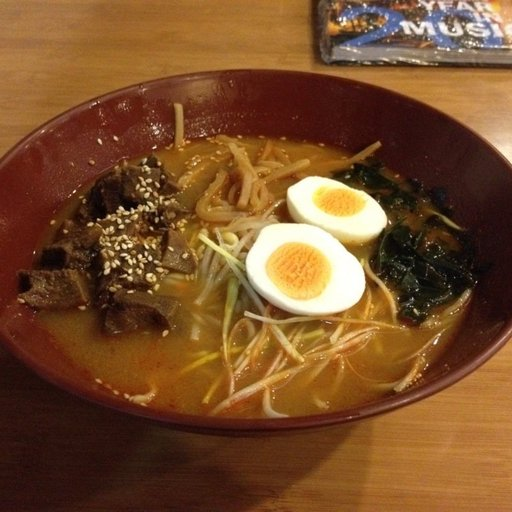

In [7]:
train_data[10000][0] #gives the image of the above

In [8]:
train_data[10000][1] #gives the label of the above-81
class_names[train_data[10000][1] ]

'ramen'

ramen


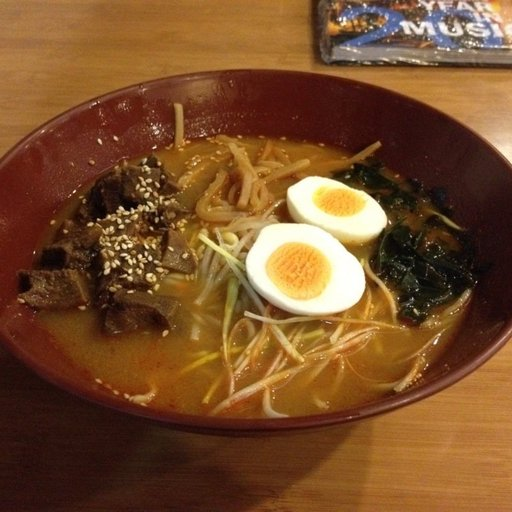

In [9]:
print(class_names[train_data[10000][1]])
train_data[10000][0]

In [10]:
#Find subset of classes
import random
data_path = data_dir/ 'food-101' / 'images'
target_classes = ['tacos','hot_dog','ice_cream']

random_no = 0.2 # only want 0.2 of the total data

def select_subset(image_path=data_path,
                  data_splits=['train','test'],
                  target_classes=['tacos','hot_dog','ice_cream'],
                  amount=0.1,seed=42):
  random.seed(42)
  label_split = {}
  for data_splt in data_splits:
    print(f'[INFO] creating image split for : {data_splt} data')
    label_path = data_dir / 'food-101' / 'meta' / f'{data_splt}.txt'
    print(label_path)
    with open(label_path, 'r') as f:
      labels = [line.strip("\n") for line in f.readlines() if line.split("/")[0] in target_classes]
      print(labels[:1])
      print('length of labels',len(labels))
    #get ramdom number of images
    random_amount = round(amount * len(labels))
    print(f"[INFO] Getting random subset of {random_amount} images for {data_splt}...")
    sample_images = random.sample(labels,k=random_amount)
    image_paths = [Path(str(image_path / sample_image) + '.jpg' ) for sample_image in sample_images]
    label_split[data_splt] = image_paths
  return label_split

label_splits = select_subset(amount=random_no)

label_splits["train"][:10]

[INFO] creating image split for : train data
../data/food-101/meta/train.txt
['hot_dog/1000288']
length of labels 2250
[INFO] Getting random subset of 450 images for train...
[INFO] creating image split for : test data
../data/food-101/meta/test.txt
['hot_dog/103364']
length of labels 750
[INFO] Getting random subset of 150 images for test...


[PosixPath('../data/food-101/images/hot_dog/337987.jpg'),
 PosixPath('../data/food-101/images/hot_dog/1440436.jpg'),
 PosixPath('../data/food-101/images/ice_cream/2677379.jpg'),
 PosixPath('../data/food-101/images/ice_cream/2172120.jpg'),
 PosixPath('../data/food-101/images/ice_cream/1864081.jpg'),
 PosixPath('../data/food-101/images/hot_dog/413825.jpg'),
 PosixPath('../data/food-101/images/hot_dog/3160632.jpg'),
 PosixPath('../data/food-101/images/tacos/912020.jpg'),
 PosixPath('../data/food-101/images/hot_dog/2699758.jpg'),
 PosixPath('../data/food-101/images/tacos/2031215.jpg')]

In [11]:
label_splits.keys()

dict_keys(['train', 'test'])

In [12]:
#Move training and testing images to dedicated folders
target_dir_name = f'../data/taco_hotdog_icecream_{str(int(random_no *100))}_percent'
print(f'Creating directory:{target_dir_name}')

#setup directory
target_dir = Path(target_dir_name)

#make directory
target_dir.mkdir(parents=True,exist_ok=True)

Creating directory:../data/taco_hotdog_icecream_20_percent


In [13]:
import shutil

for image_split in label_splits.keys():
    for image_path in label_splits[str(image_split)]:
        dest_dir = target_dir / image_split / image_path.parent.stem / image_path.name
        if not dest_dir.parent.is_dir():
            dest_dir.parent.mkdir(parents=True, exist_ok=True)
        print(f"[INFO] Copying {image_path} to {dest_dir}...")
        shutil.copy2(image_path, dest_dir)

[INFO] Copying ../data/food-101/images/hot_dog/337987.jpg to ../data/taco_hotdog_icecream_20_percent/train/hot_dog/337987.jpg...
[INFO] Copying ../data/food-101/images/hot_dog/1440436.jpg to ../data/taco_hotdog_icecream_20_percent/train/hot_dog/1440436.jpg...
[INFO] Copying ../data/food-101/images/ice_cream/2677379.jpg to ../data/taco_hotdog_icecream_20_percent/train/ice_cream/2677379.jpg...
[INFO] Copying ../data/food-101/images/ice_cream/2172120.jpg to ../data/taco_hotdog_icecream_20_percent/train/ice_cream/2172120.jpg...
[INFO] Copying ../data/food-101/images/ice_cream/1864081.jpg to ../data/taco_hotdog_icecream_20_percent/train/ice_cream/1864081.jpg...
[INFO] Copying ../data/food-101/images/hot_dog/413825.jpg to ../data/taco_hotdog_icecream_20_percent/train/hot_dog/413825.jpg...
[INFO] Copying ../data/food-101/images/hot_dog/3160632.jpg to ../data/taco_hotdog_icecream_20_percent/train/hot_dog/3160632.jpg...
[INFO] Copying ../data/food-101/images/tacos/912020.jpg to ../data/taco_hot

In [14]:
# Check lengths of directories
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  import os
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

walk_through_dir(target_dir)

There are 2 directories and 0 images in '../data/taco_hotdog_icecream_20_percent'.
There are 3 directories and 0 images in '../data/taco_hotdog_icecream_20_percent/train'.
There are 0 directories and 146 images in '../data/taco_hotdog_icecream_20_percent/train/ice_cream'.
There are 0 directories and 154 images in '../data/taco_hotdog_icecream_20_percent/train/hot_dog'.
There are 0 directories and 150 images in '../data/taco_hotdog_icecream_20_percent/train/tacos'.
There are 3 directories and 0 images in '../data/taco_hotdog_icecream_20_percent/test'.
There are 0 directories and 58 images in '../data/taco_hotdog_icecream_20_percent/test/ice_cream'.
There are 0 directories and 46 images in '../data/taco_hotdog_icecream_20_percent/test/hot_dog'.
There are 0 directories and 46 images in '../data/taco_hotdog_icecream_20_percent/test/tacos'.


In [15]:
zip_file_name = data_dir / f'taco_hotdog_icecream_{str(int(random_no *100))}_percent'
shutil.make_archive(zip_file_name,
                    format="zip",
                    root_dir=target_dir)

'/data/taco_hotdog_icecream_20_percent.zip'

In [16]:
!ls -la ../data/

total 4907964
drwxr-xr-x 4 root root       4096 Jan 17 01:38 .
drwxr-xr-x 1 root root       4096 Jan 17 01:19 ..
drwxr-xr-x 4 3156  320       4096 Jul  9  2014 food-101
-rw-r--r-- 1 root root 4996278331 Jan 17 01:20 food-101.tar.gz
drwxr-xr-x 4 root root       4096 Jan 17 01:22 taco_hotdog_icecream_20_percent
-rw-r--r-- 1 root root   29453107 Jan 17 01:38 taco_hotdog_icecream_20_percent.zip


In [17]:
!mkdir -p taco_hotdog_icecreamv
!unzip ../data/taco_hotdog_icecream_20_percent.zip -d taco_hotdog_icecream

Archive:  ../data/taco_hotdog_icecream_20_percent.zip
   creating: taco_hotdog_icecream/test/
   creating: taco_hotdog_icecream/train/
   creating: taco_hotdog_icecream/train/hot_dog/
   creating: taco_hotdog_icecream/train/ice_cream/
   creating: taco_hotdog_icecream/train/tacos/
  inflating: taco_hotdog_icecream/train/ice_cream/864405.jpg  
  inflating: taco_hotdog_icecream/train/ice_cream/2689765.jpg  
  inflating: taco_hotdog_icecream/train/ice_cream/565344.jpg  
  inflating: taco_hotdog_icecream/train/ice_cream/2535464.jpg  
  inflating: taco_hotdog_icecream/train/ice_cream/885709.jpg  
  inflating: taco_hotdog_icecream/train/ice_cream/101858.jpg  
  inflating: taco_hotdog_icecream/train/ice_cream/2501248.jpg  
  inflating: taco_hotdog_icecream/train/ice_cream/1962995.jpg  
  inflating: taco_hotdog_icecream/train/ice_cream/3917130.jpg  
  inflating: taco_hotdog_icecream/train/ice_cream/518018.jpg  
  inflating: taco_hotdog_icecream/train/ice_cream/3610816.jpg  
  inflating: taco_h

In [18]:
!ls ../data

food-101  food-101.tar.gz  taco_hotdog_icecream_20_percent  taco_hotdog_icecream_20_percent.zip
